**Lasso regression with KMean clustering** is used to find the shear modulus of viscoelastic material. Only Lasso regression gives us good results but it also gives lagre number of Maxwell series coefficients. To reduce this large number of coefficients, KMean clustering technique is also used along with Lasso regression technique.   

Load necessary library

In [121]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

Load experimental data

In [122]:
## Experimental data has been collected from the reference paper([L. Andreozzi et al. / Construction and Building Materials 65 (2014) 1–13]).

o_data = pd.read_csv('./sample_data/Data_076.csv')
o_data.head()

,omega,Gp,Gdp
0,2.003440e-08,0.07210,0.00603
1,3.566130e-08,0.06703,0.01921
2,6.330880e-08,0.07548,0.02940
3,1.125930e-07,0.08393,0.02597
4,2.003440e-07,0.09181,0.03030


Convert experimental data into necessary format or unit.

In [123]:
O_Omega=(o_data['omega'].to_numpy()*0.1591549)
O_Gp=(o_data['Gp'].to_numpy()*10**6)
O_Gdp=(o_data['Gdp'].to_numpy()*10**6)

Plot Storage molulus versus frequency to see the nature of experimental data.

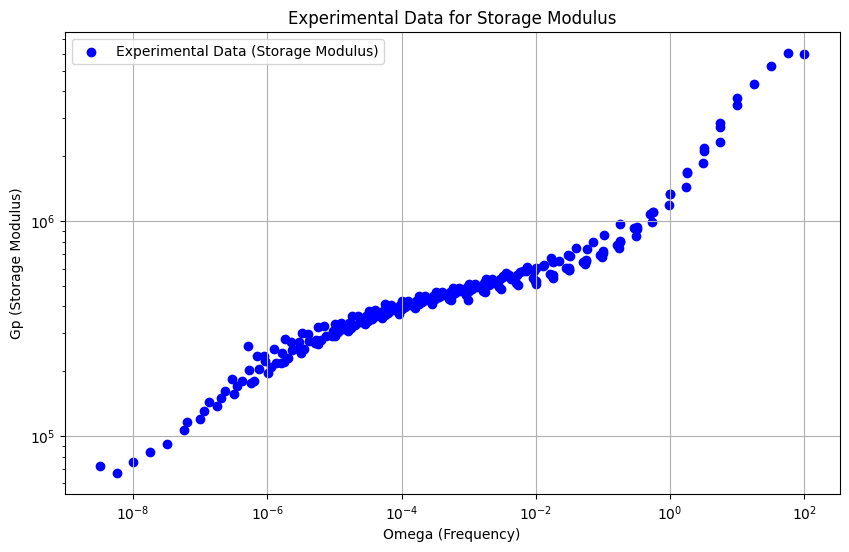

In [124]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(O_Omega, O_Gp, label="Experimental Data (Storage Modulus)", color="blue")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gp (Storage Modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Experimental Data for Storage Modulus")
plt.grid(True)
plt.savefig('./sample_data/Gp_076_Raw.png')
plt.show()

Plot Loss molulus versus frequency to see the nature of experimental data.

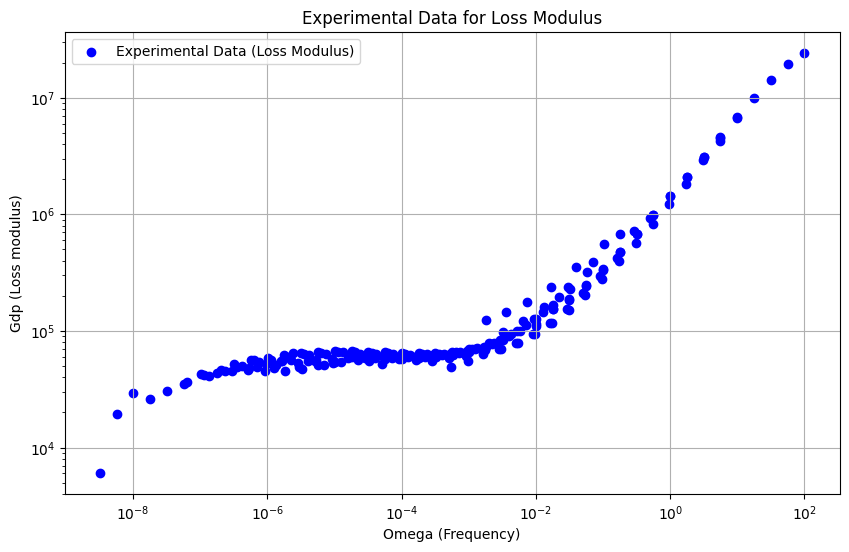

In [125]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(O_Omega, O_Gdp, label="Experimental Data (Loss Modulus)", color="blue")
plt.xlabel("Omega (Frequency)")
plt.ylabel("Gdp (Loss modulus)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Experimental Data for Loss Modulus")
plt.grid(True)
plt.savefig('./sample_data/Gdp_076_Raw.png')
plt.show()

Convert experimental data into necessary format or unit.

In [126]:
L_omega=np.log10(o_data['omega'].to_numpy()*0.1591549)
L_Gp=np.log10(o_data['Gp'].to_numpy()*10**6)
L_Gdp=np.log10(o_data['Gdp'].to_numpy()*10**6)

Noise elemination, select degree or power of best fit curve for the experimental data (Storage Modulus)

In [127]:
degree=5
# Fit the polynomial model
coef = np.polyfit(L_omega, L_Gp, degree)
# Create the polynomial function
polynomial_function1 = np.poly1d(coef)

Consider a high number of relaxation times using experience. Only consider other necessary variables.

In [128]:
# Generate X values for the fitted curve
number_coefficients=39    ##### Number of Relaxation Time
number_omega=500
omega_fit=np.linspace(min(L_omega), max(L_omega), number_omega)

Calculate noise free storage modulus

In [129]:
# Calculate the corresponding Y values for the fitted curve
Gp_fit = polynomial_function1(omega_fit)

Draw the best fit and noise free storage modulus from experimental data

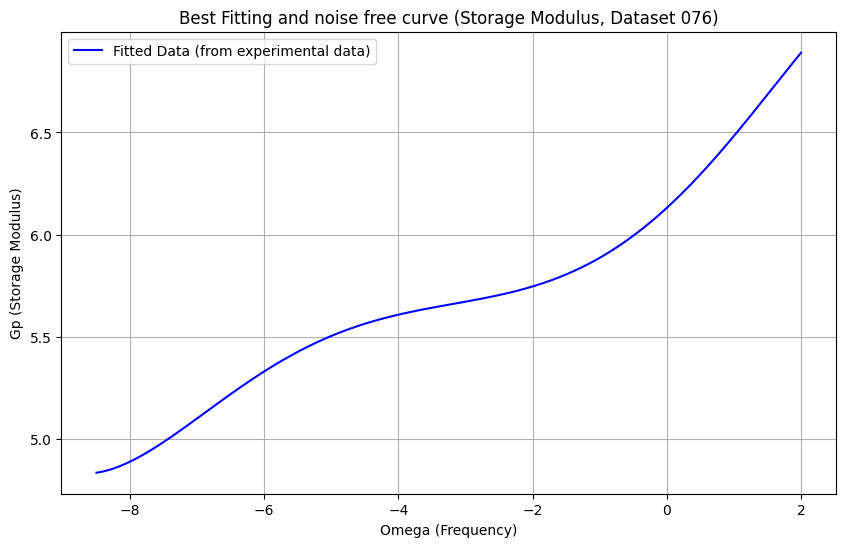

In [130]:
# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(omega_fit, Gp_fit, label='Fitted Data (from experimental data)', color='blue')
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.title('Best Fitting and noise free curve (Storage Modulus, Dataset 076)')
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/fit_Gp_076.png')
plt.show()

 select degree or power of best fit curve for the experimental data (Loss Modulus)

In [131]:
# Fit the polynomial model
coef = np.polyfit(L_omega, L_Gdp, degree)
# Create the polynomial function
polynomial_function2 = np.poly1d(coef)

Calculate noise free storage modulus

In [132]:
# Calculate the corresponding Y values for the fitted curve
Gdp_fit = polynomial_function2(omega_fit)

Draw the best fit and noise free storage modulus from experimental data

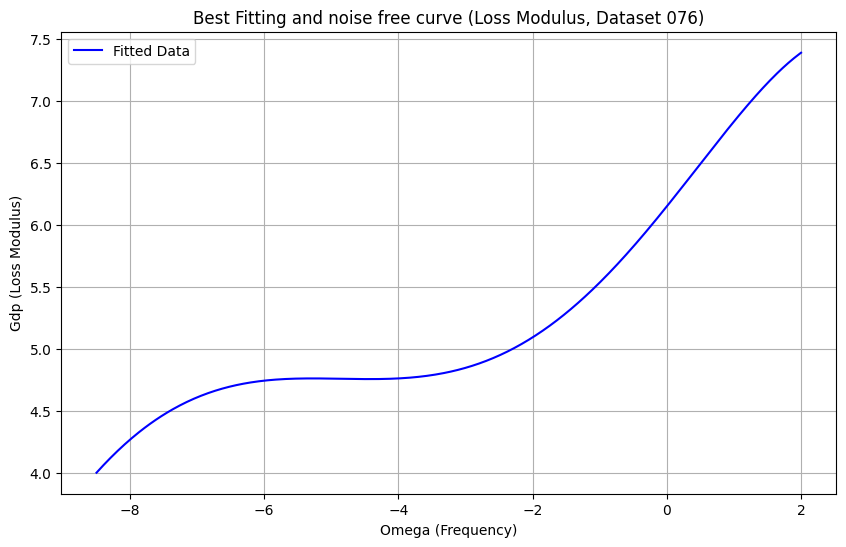

In [133]:
# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(omega_fit, Gdp_fit, label='Fitted Data', color='blue')
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.title('Best Fitting and noise free curve (Loss Modulus, Dataset 076)')
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/fit_Gdp_076.png')
plt.show()

Check effectiveness of fitting curve (noise free storage modulus).

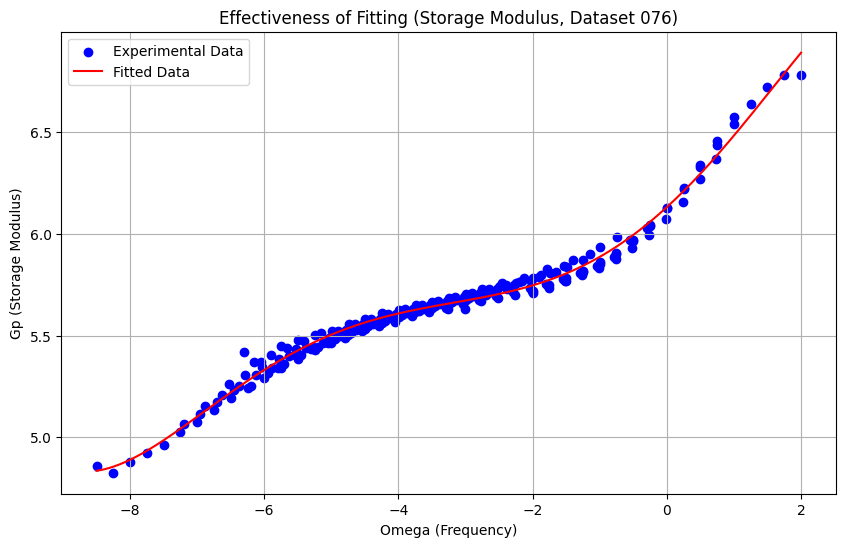

In [134]:
# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(L_omega, L_Gp, label='Experimental Data', color='blue')
plt.plot(omega_fit, Gp_fit, label='Fitted Data', color='red')
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.title('Effectiveness of Fitting (Storage Modulus, Dataset 076)')
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/ef_fit_Gp_076.png')
plt.show()

Check effectiveness of fitting curve (noise free loss modulus).

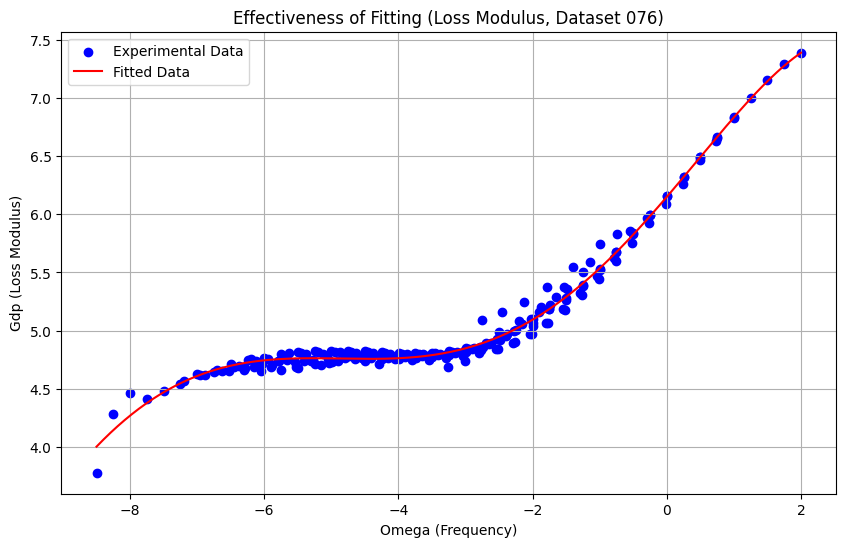

In [135]:
# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(L_omega, L_Gdp, label='Experimental Data', color='blue')
plt.plot(omega_fit, Gdp_fit, label='Fitted Data', color='red')
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.title('Effectiveness of Fitting (Loss Modulus, Dataset 076)')
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/ef_fit_Gdp_076.png')
plt.show()

convert log variables to normal variables

In [136]:
##### Fitted Data ####################
f_Gp=10**(Gp_fit )
f_Gdp=10**(Gdp_fit )
f_Omega=10**(omega_fit)

Assign some necessary variables

In [137]:
##### Number of Relaxation Time
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

np.random.seed(42)
A=np.random.rand(2*number_omega,number_coefficients)
G=np.random.rand(2*number_omega)
t=np.random.rand(number_coefficients)
coefficients=np.random.rand(number_coefficients)

Assign a large number of relaxation times

In [138]:
t=np.logspace(-5,8,number_coefficients) #

Assign **A** matrix of the linear system

In [139]:
for i in range(0,number_coefficients):   #
  A[0:number_omega,i]=((f_Omega**2)*(t[i]**2))/(1+(f_Omega**2)*(t[i]**2))
  A[number_omega:2*number_omega,i]=((f_Omega)*(t[i]))/(1+(f_Omega**2)*(t[i]**2))

Assign **G** matrix of the linear system

In [140]:
G[0:number_omega]=f_Gp    #
G[number_omega:number_omega*2]=f_Gdp

Select Large amount of alpha as a penelty terms in Lasso regression.

In [141]:
alphas_number=800
alphas = np.logspace(-3, 5, alphas_number)  #

Assign necessary parameter for Lasso regression

In [142]:
# Initialize lists to store errors          #####
train_errors = np.random.rand(alphas_number+1)
t_error = 1e200
coefficients = np.random.rand(number_coefficients)
temp_coeff = np.random.rand(number_coefficients)
All_coefficients=np.random.rand(alphas_number+1,number_coefficients)
nonzero_coefficients = np.random.rand(alphas_number+1)
All_alphas=np.random.rand(alphas_number+1)

Apply Lasso regression technique and minimize the errors

In [143]:
# Train Lasso regression model for each alpha         #########
counter=0
index=0
non_zero_co=0
All_coefficients[0,:]=t
train_errors[0] = 0
nonzero_coefficients[0] =0
All_alphas[0]=0
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha,max_iter=1000, tol=0.0001,warm_start=False)
    lasso_reg.fit(A, G)

    # Compute training error
    train_pred = lasso_reg.predict(A)
    train_error = np.sqrt(mean_squared_error(G, train_pred))
    train_errors[counter+1] = train_error
    temp_coeff=lasso_reg.coef_
    for i in range(0,number_coefficients):
      if temp_coeff[i]<0:
        temp_coeff[i]=0
    All_coefficients[counter+1,:] = temp_coeff
    nonzero_coefficients[counter+1] = (np.count_nonzero(temp_coeff))
    All_alphas[counter+1]=alpha
    counter=counter+1
    if t_error> train_error:
      t_error = train_error
      index=counter
      non_zero_co=(np.count_nonzero(temp_coeff))
      coefficients = temp_coeff

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.828e+13, tolerance: 1.184e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.828e+13, tolerance: 1.184e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.828e+13, tolerance: 1.184e

Plot the performance of Lasso regression by errors versus alpha and non-zero coefficients versus alpha where alpha is a penelty term.

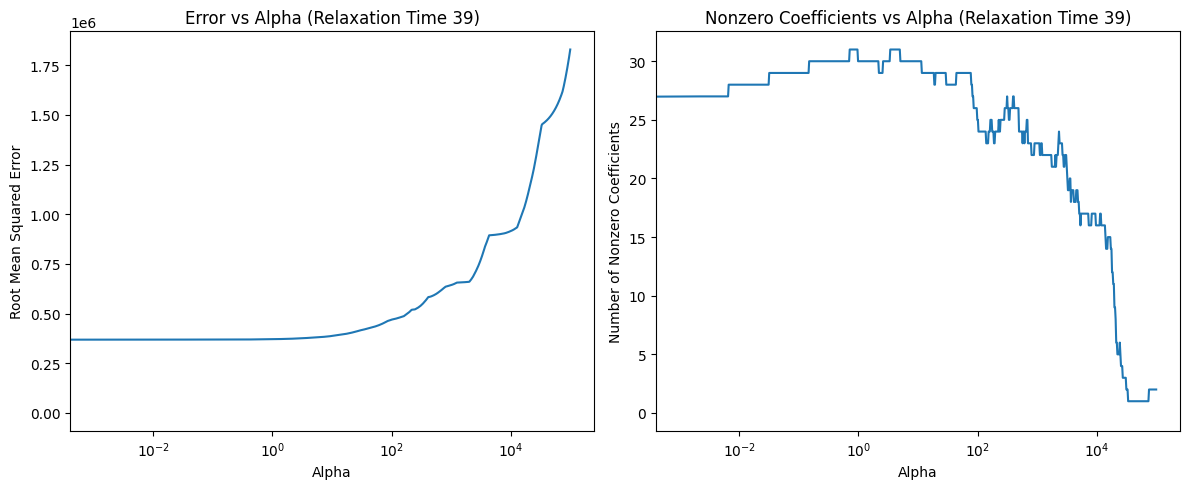

In [144]:
# Plot both error vs alpha and number of nonzero coefficients vs alpha together ########
plt.figure(figsize=(12, 5))

# Plot error vs alpha
plt.subplot(1, 2, 1)
plt.plot(All_alphas, train_errors)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('Error vs Alpha (Relaxation Time '+str(number_coefficients)+')')                   ####### Change Relaxation Time

# Plot number of nonzero coefficients vs alpha
plt.subplot(1, 2, 2)
plt.plot(All_alphas, nonzero_coefficients)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Nonzero Coefficients')
plt.title('Nonzero Coefficients vs Alpha (Relaxation Time '+str(number_coefficients)+')')     ####### Change Relaxation Time

plt.tight_layout()
plt.savefig('./sample_data/Lasso1_error01_for_'+str(number_coefficients)+'.png')                      ####### Change Relaxation Time
plt.show()

Print necessary parameters of Lasso regression

In [145]:
print("Errors:",t_error)                            ############### Copy the error values
print("Coefficients:",coefficients)
print("index:",index)
print("Num of Zero Coef:",non_zero_co)

Errors: 369272.05477921164
Coefficients: [9.16537500e+10 2.06694750e+08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.92731618e+07 1.46679518e+06 0.00000000e+00
 2.67568800e+06 0.00000000e+00 4.54706191e+05 2.11020606e+05
 1.80325609e+04 1.00740495e+05 5.40537857e+04 3.08342126e+04
 3.38903518e+04 2.46263957e+04 1.91287946e+04 2.00045753e+04
 1.89802553e+04 1.75276892e+04 2.22382161e+04 2.84025749e+04
 2.67813249e+04 2.74985267e+04 3.94515716e+04 3.79426712e+04
 2.07073371e+04 3.45852705e+04 4.53408349e+04 0.00000000e+00
 9.31806233e+03 8.20022775e+04 0.00000000e+00]
index: 128
Num of Zero Coef: 28


Plot the coefficients of Maxwell series that found from Lasso regression by minimizing the loss function

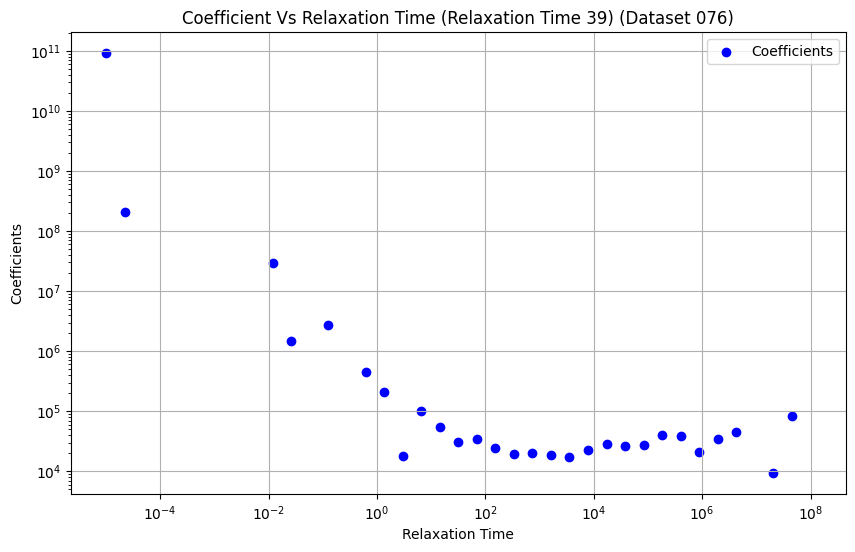

In [146]:
# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(t, coefficients, label='Coefficients', color='blue')
plt.xlabel('Relaxation Time')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.yscale('log')
plt.title('Coefficient Vs Relaxation Time (Relaxation Time '+str(number_coefficients)+') (Dataset 076)')    ######### Change Relaxation Time
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/Lasso1_Cof_V_Re_076_for_'+str(number_coefficients)+'.png')            ######### Change Relaxation Time
plt.show()

Calculate the shear modulus and loss modulus using the calculated coefficients of Maxwell series.

In [147]:
Gp_C=0
Gdp_C=0
Gt_C=0
t0=1/f_Omega

for i in range(0,number_coefficients):
  Gp_C=Gp_C+((f_Omega**2)*(t[i]**2))/(1+(f_Omega**2)*(t[i]**2))*coefficients[i]
  Gdp_C=Gdp_C+((f_Omega)*(t[i]))/(1+(f_Omega**2)*(t[i]**2))*coefficients[i]
  Gt_C=Gt_C+ coefficients[i]*(np.exp(-t0/t[i]))


loss1=np.sqrt((1/200)*(np.sum((f_Gp-Gp_C)**2)))
loss2=np.sqrt((1/200)*(np.sum((f_Gdp-Gdp_C)**2)))
Total_loss=loss1+loss2

Plot and check the efficiency of Lasso regression for storage modulus

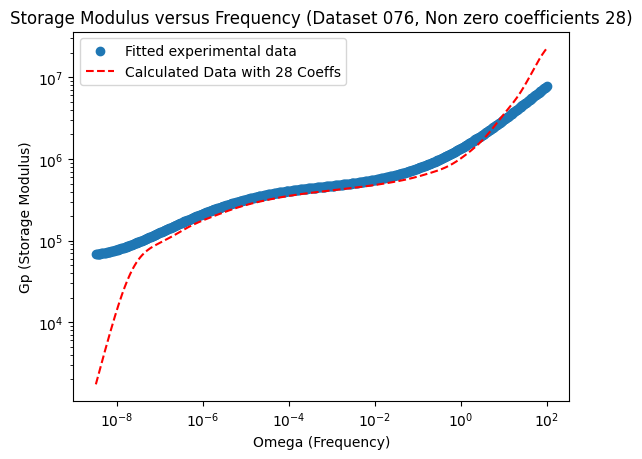

In [148]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted experimental data')
plt.plot(f_Omega, Gp_C, linestyle='--', color='red', label='Calculated Data with '+str(non_zero_co)+' Coeffs')
plt.title('Storage Modulus versus Frequency (Dataset 076, Non zero coefficients '+str(non_zero_co)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Plot and check the efficiency of Lasso regression for loss modulus

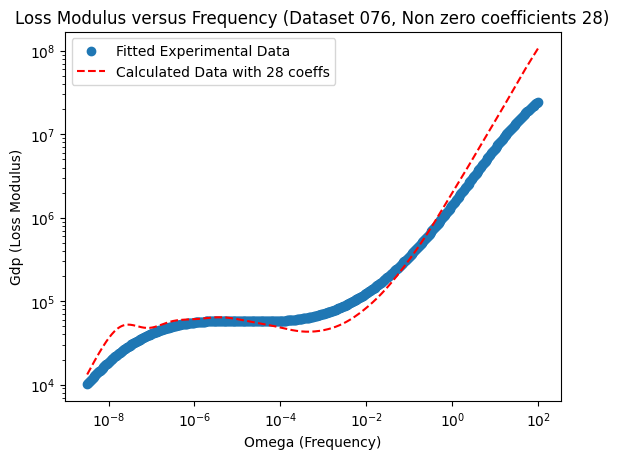

In [149]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_C, linestyle='--', color='red', label='Calculated Data with '+str(non_zero_co)+' coeffs')
plt.title('Loss Modulus versus Frequency (Dataset 076, Non zero coefficients '+str(non_zero_co)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gdp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Calculated coefficients in the conventional process (see the reference)

In [150]:
Co_A=[514628, 280116, 144282, 86904, 76190, 92202, 98780, 85555, 70251, 107653]
Co_t=[9.51E-02, 4.71E-01, 2.72E+00, 2.11E+01, 2.21E+02, 2.12E+03, 1.74E+04, 1.31E+05, 1.05E+06, 2.99E+07]

Calculate Storage Modulus and Loss Modulus using coefficients that found by convensional process.

In [151]:
Gp_A=0
Gdp_A=0
Gt_A=0

for i in range(0,10):
  Gp_A=Gp_A+((f_Omega**2)*(Co_t[i]**2))/(1+(f_Omega**2)*(Co_t[i]**2))*Co_A[i]
  Gdp_A=Gdp_A+((f_Omega)*(Co_t[i]))/(1+(f_Omega**2)*(Co_t[i]**2))*Co_A[i]
  Gt_A=Gt_A+Co_A[i]*(np.exp(-t0/Co_t[i]))


loss1=np.sqrt((1/200)*(np.sum((f_Gp-Gp_A)**2)))
loss2=np.sqrt((1/200)*(np.sum((f_Gdp-Gdp_A)**2)))
Total_loss=loss1+loss2
print(Total_loss)

9685152.843880108


Comparison between convensional and data-driven techniques for storage modulus

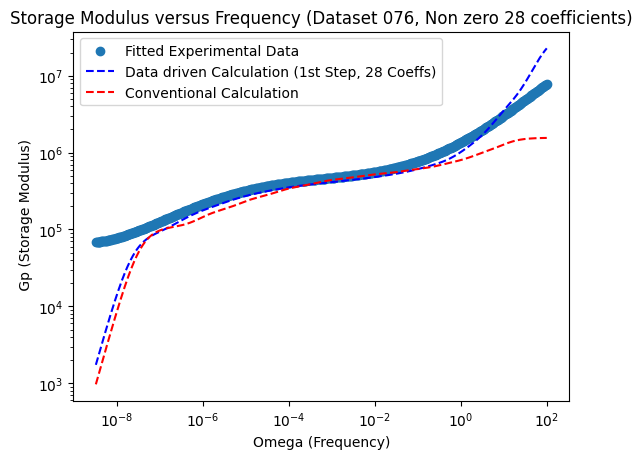

In [152]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gp_C, linestyle='--',color='blue', label='Data driven Calculation (1st Step, '+str(non_zero_co)+' Coeffs)')
plt.plot(f_Omega, Gp_A, linestyle='--',color='red', label='Conventional Calculation')
plt.title('Storage Modulus versus Frequency (Dataset 076, Non zero '+str(non_zero_co)+' coefficients)')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel(' Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso1_Gp_B_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison between convensional and data-driven techniques for loss modulus

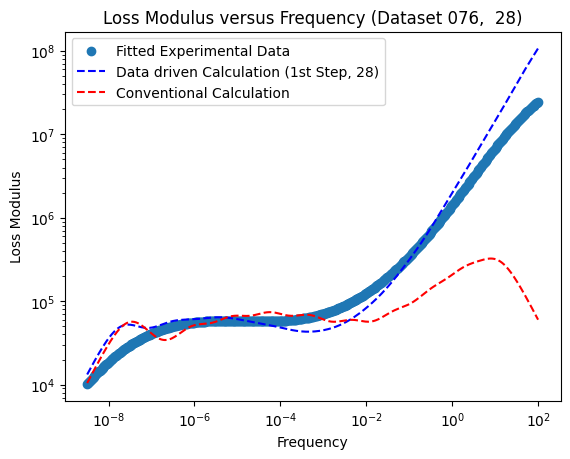

In [153]:
# Plot actual vs predicted values   ###################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_C, linestyle='--', color='blue', label='Data driven Calculation (1st Step, '+str(non_zero_co)+')')
plt.plot(f_Omega, Gdp_A, linestyle='--', color='red', label='Conventional Calculation')
plt.title('Loss Modulus versus Frequency (Dataset 076,  '+str(non_zero_co)+')')    #### Chnage Relaxation Time
plt.xlabel('Frequency')
plt.ylabel('Loss Modulus')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gdp_B_log02_for_'+str(number_coefficients)+'.png')   ##### Chnage Relaxation Time
plt.show()

Assign new array X with series coefficients and relaxation times to apply clustering

In [154]:
X = np.random.rand(non_zero_co,2)
ct=0
for i in range(0,number_coefficients):
  if coefficients[i]>1:
    X[ct,0]=t[i]
    X[ct,1]=coefficients[i]
    ct=ct+1

Applying K-mean clustering to reduce the number of coefficients

In [155]:
# Function to perform K-means clustering and retrieve cluster information
def perform_clustering(data, max_clusters):
    best_model = None
    best_score = float('inf')
    cluster_centers = None
    cluster_counts = None
    num_clusters = None

    for k in range(1, max_clusters + 1):
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        # Calculate score for this model
        score = kmeans.inertia_

        # Update if this model has the lowest score
        if score < best_score:
            best_score = score
            best_model = kmeans
            num_clusters = k
            cluster_centers = kmeans.cluster_centers_
            cluster_counts = np.bincount(kmeans.labels_)

    return best_model, cluster_centers, cluster_counts, num_clusters

# Define maximum number of clusters to search for
#max_clusters = 18
max_clusters = (int)(non_zero_co/2)

# Perform clustering
best_model, cluster_centers, cluster_counts, num_clusters = perform_clustering(X, max_clusters)

# Print results
print("Number of clusters:", num_clusters)
for i in range(num_clusters):
    print(f"Cluster {i+1}: Center = {cluster_centers[i]}, Number of elements = {cluster_counts[i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 14
Cluster 1: Center = [2.63665090e-02 1.46679518e+06], Number of elements = 1
Cluster 2: Center = [1.00000761e-05 9.16537500e+10], Number of elements = 1
Cluster 3: Center = [2.19838694e-05 2.06694750e+08], Number of elements = 1
Cluster 4: Center = [45487779.47003787    82002.27753115], Number of elements = 1
Cluster 5: Center = [1.19935395e-02 2.92731618e+07], Number of elements = 1
Cluster 6: Center = [2.06913808e+07 9.31806234e+03], Number of elements = 1
Cluster 7: Center = [22416.59031376 32146.08867645], Number of elements = 15
Cluster 8: Center = [4281332.3987194    45340.83492994], Number of elements = 1
Cluster 9: Center = [1947483.03990876   34585.27047062], Number of elements = 1
Cluster 10: Center = [885866.79041008  20707.33707619], Number of elements = 1
Cluster 11: Center = [1.27427498e-01 2.67568800e+06], Number of elements = 1
Cluster 12: Center = [6.15848211e-01 4.54706191e+05], Number of elements = 1
Cluster 13: Center = [402961.13202004  37942.

Plot the coefficients in different clusters

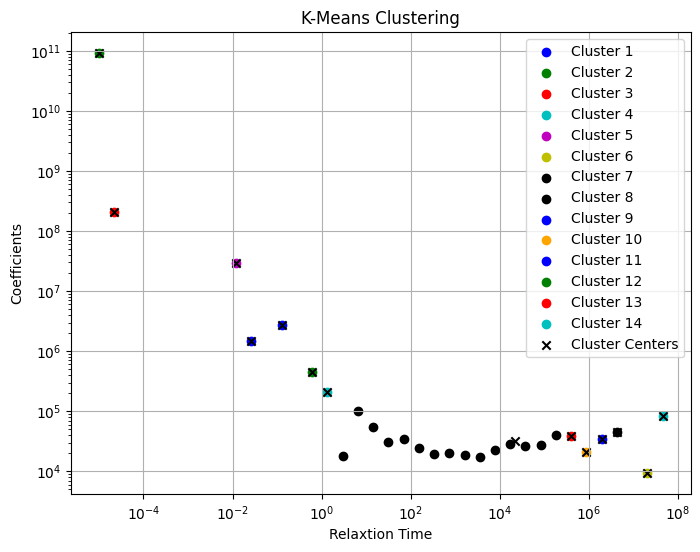

In [156]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Assign different colors to each cluster
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','black','blue','orange','b', 'g', 'r', 'c', 'm', 'y', 'k','black','blue','orange','b', 'g', 'r', 'c', 'm', 'y', 'k','black']

for i in range(num_clusters):
    cluster_data = X[best_model.labels_ == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Relaxtion Time')
plt.ylabel('Coefficients')
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/Lasso1_Cluster_log02_for_'+str(number_coefficients)+'.png')   ##### Chnage Relaxation Time
plt.show()

Calculate storage and loss modulus using the new set of coefficients after clustering

In [157]:
Gp_Cu=0
Gdp_Cu=0
Gt_Cu=0

for i in range(0,num_clusters):
  Gp_Cu=Gp_Cu+((f_Omega**2)*(cluster_centers[i][0]**2))/(1+(f_Omega**2)*(cluster_centers[i][0]**2))*cluster_centers[i][1]*cluster_counts[i]
  Gdp_Cu=Gdp_Cu+((f_Omega)*(cluster_centers[i][0]))/(1+(f_Omega**2)*(cluster_centers[i][0]**2))*cluster_centers[i][1]*cluster_counts[i]
  Gt_Cu=Gt_Cu+(np.exp(-t0/cluster_centers[i][0]))*cluster_centers[i][1]*cluster_counts[i]

loss1c=np.sqrt((1/200)*(np.sum((f_Gp-Gp_Cu)**2)))
loss2c=np.sqrt((1/200)*(np.sum((f_Gdp-Gdp_Cu)**2)))
Total_lossc=loss1c+loss2c
print(Total_lossc)

########  Cluster Coefficients ######################
Cof_C=np.random.rand(num_clusters)
t_C=np.random.rand(num_clusters)
for i in range(0,num_clusters):
  Cof_C[i]=cluster_centers[i][1]*cluster_counts[i]
  t_C[i]=cluster_centers[i][0]



22707584.04269079


Plot storage modulus to check the efficiency of analysis after clustering

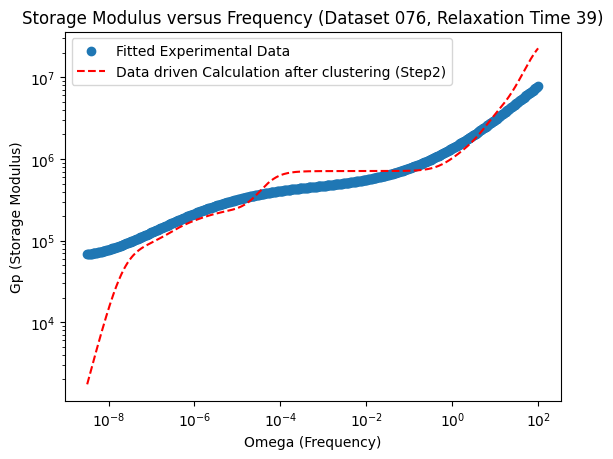

In [158]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gp_Cu, linestyle='--', color='red', label='Data driven Calculation after clustering (Step2)')
plt.title('Storage Modulus versus Frequency (Dataset 076, Relaxation Time '+str(number_coefficients)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Plot loss modulus to check the efficiency of analysis after clustering

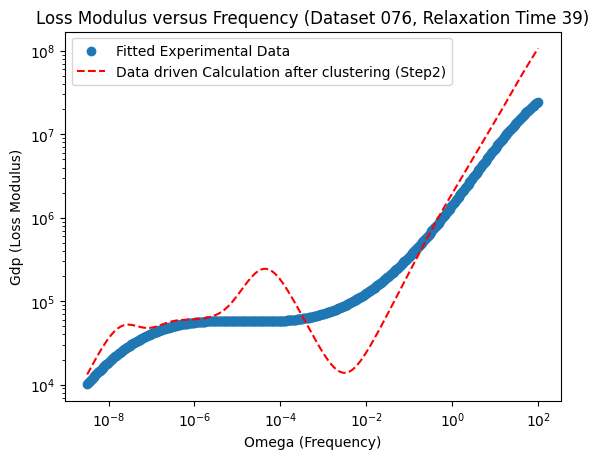

In [159]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_Cu, linestyle='--', color='red', label='Data driven Calculation after clustering (Step2)')
plt.title('Loss Modulus versus Frequency (Dataset 076, Relaxation Time '+str(number_coefficients)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison between data-driven and conventional techniques for storage modulus.

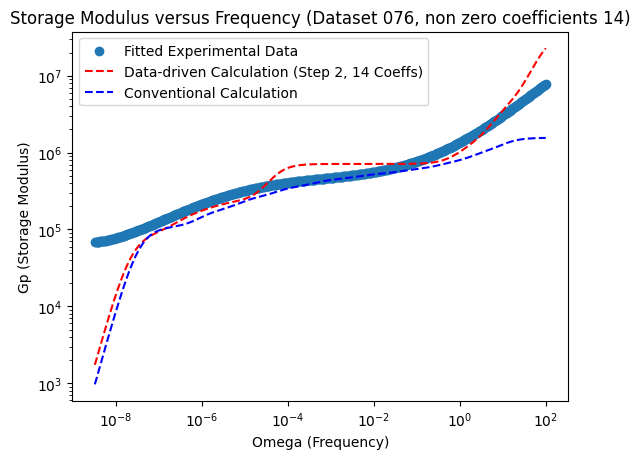

In [160]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gp_Cu, linestyle='--', color='red', label='Data-driven Calculation (Step 2, '+str(num_clusters)+' Coeffs)')
plt.plot(f_Omega, Gp_A, linestyle='--', color='blue', label='Conventional Calculation')
plt.title('Storage Modulus versus Frequency (Dataset 076, non zero coefficients '+str(num_clusters)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso1_Clus_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison between data-driven and conventional techniques for loss modulus.

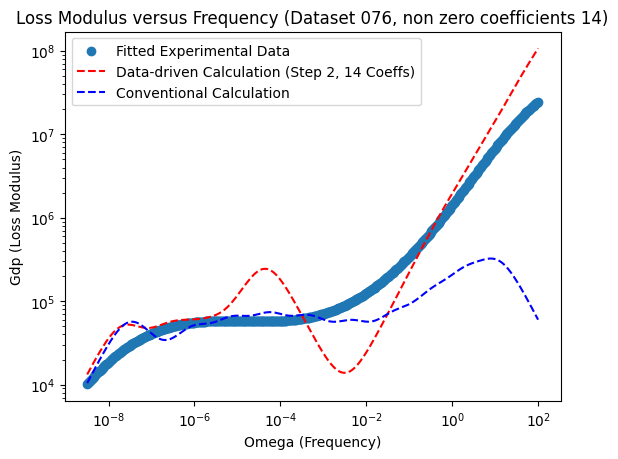

In [161]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_Cu, linestyle='--', color='red', label='Data-driven Calculation (Step 2, '+str(num_clusters)+' Coeffs)')
plt.plot(f_Omega, Gdp_A, linestyle='--', color='blue', label='Conventional Calculation')
plt.title('Loss Modulus versus Frequency (Dataset 076, non zero coefficients '+str(num_clusters)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso1_Clus_Gdp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Assign necessary variables to apply Lasso regression again

In [162]:
##### 2nd Lasso Application ##################################################################
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

np.random.seed(42)
A1=np.random.rand(2*number_omega,num_clusters)
G1=np.random.rand(2*number_omega)
t1=np.random.rand(num_clusters)
coef1=np.random.rand(num_clusters)

Assign modified relaxation times from the clustering data

In [163]:
t1=np.sort(t_C) #

Form **A1** matrix to create linear relation

In [164]:
for i in range(0,num_clusters):   #
  A1[0:number_omega,i]=((f_Omega**2)*(t1[i]**2))/(1+(f_Omega**2)*(t1[i]**2))
  A1[number_omega:2*number_omega,i]=((f_Omega)*(t1[i]))/(1+(f_Omega**2)*(t1[i]**2))

Form **G1** matrix to create linear relation

In [165]:
G1[0:number_omega]=f_Gp    #
G1[number_omega:number_omega*2]=f_Gdp

Consider large number of alpha or penelty terms

In [166]:
alphas_number=800
alphas2 = np.logspace(-3, 5, alphas_number)  #

Assign necessary variable for the Lasso regression

In [167]:
# Initialize lists to store errors          #####
train_errors2 = np.random.rand(alphas_number+1)
t_error = 1e200
#coefficients = np.random.rand(number_coefficients)
temp_coeff2 = np.random.rand(num_clusters)
All_coefficients2=np.random.rand(alphas_number+1,num_clusters)
nonzero_coefficients2 = np.random.rand(alphas_number+1)
All_alphas2=np.random.rand(alphas_number+1)

Apply Lasso regression and to minimize the loss function

In [168]:
# Train Lasso regression model for each alpha         #########
counter2=0
index2=0
non_zero_co2=0
All_coefficients2[0,:]=t1
train_errors2[0] = 0
nonzero_coefficients2[0] =0
All_alphas2[0]=0
for alpha in alphas2:
    lasso_reg = Lasso(alpha=alpha,max_iter=1000, tol=0.0001,warm_start=False)
    lasso_reg.fit(A1, G1)

    # Compute training error
    train_pred = lasso_reg.predict(A1)
    train_error = np.sqrt(mean_squared_error(G1, train_pred))
    train_errors2[counter2+1] = train_error
    temp_coeff2=lasso_reg.coef_
    for i in range(0,num_clusters):
      if temp_coeff2[i]<0:
        temp_coeff2[i]=0
    All_coefficients2[counter2+1,:] = temp_coeff2
    nonzero_coefficients2[counter2+1] = (np.count_nonzero(temp_coeff2))
    All_alphas2[counter2+1]=alpha
    counter2=counter2+1
    if t_error> train_error:
      t_error = train_error
      index=counter2
      non_zero_co2=(np.count_nonzero(temp_coeff2))
      coef1 = temp_coeff2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+14, tolerance: 1.184e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+14, tolerance: 1.184e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+14, tolerance: 1.184e

Plot the performence of regression by error versus alpha (penelty terms) and non zero coefficients versus alpha (penelty terms)

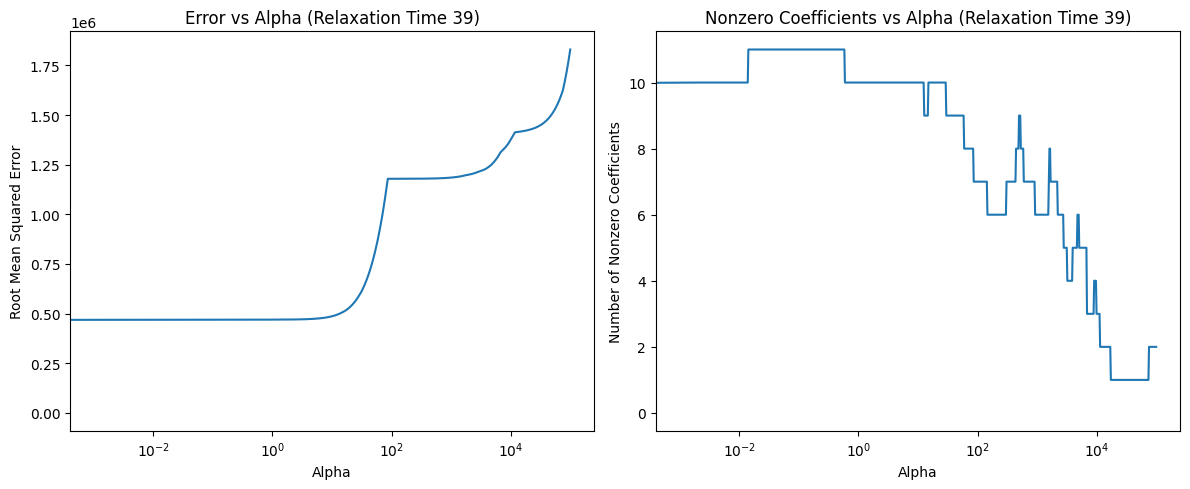

In [169]:
# Plot both error vs alpha and number of nonzero coefficients vs alpha together ########
plt.figure(figsize=(12, 5))

# Plot error vs alpha
plt.subplot(1, 2, 1)
plt.plot(All_alphas2, train_errors2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('Error vs Alpha (Relaxation Time '+str(number_coefficients)+')')                   ####### Change Relaxation Time

# Plot number of nonzero coefficients vs alpha
plt.subplot(1, 2, 2)
plt.plot(All_alphas2, nonzero_coefficients2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Nonzero Coefficients')
plt.title('Nonzero Coefficients vs Alpha (Relaxation Time '+str(number_coefficients)+')')     ####### Change Relaxation Time

plt.tight_layout()
plt.savefig('./sample_data/Lasso2_error01_for_'+str(number_coefficients)+'.png')                      ####### Change Relaxation Time
plt.show()

Print the results of Lasso regression

In [170]:
print("Errors:",t_error)                            ############### Copy the error values
print("Coefficients:",coef1)
print("index:",index2)
print("Num of Zero Coef:",non_zero_co2)

Errors: 469136.1102626597
Coefficients: [3.07210279e+10 0.00000000e+00 0.00000000e+00 1.42857526e+07
 3.62571695e+05 7.25275893e+05 3.40976783e+05 2.19631534e+05
 5.01310177e+04 4.38769503e+04 6.47221059e+04 0.00000000e+00
 2.31429328e+05 0.00000000e+00]
index: 0
Num of Zero Coef: 10


Plot the non zero coefficients after Lasso regression

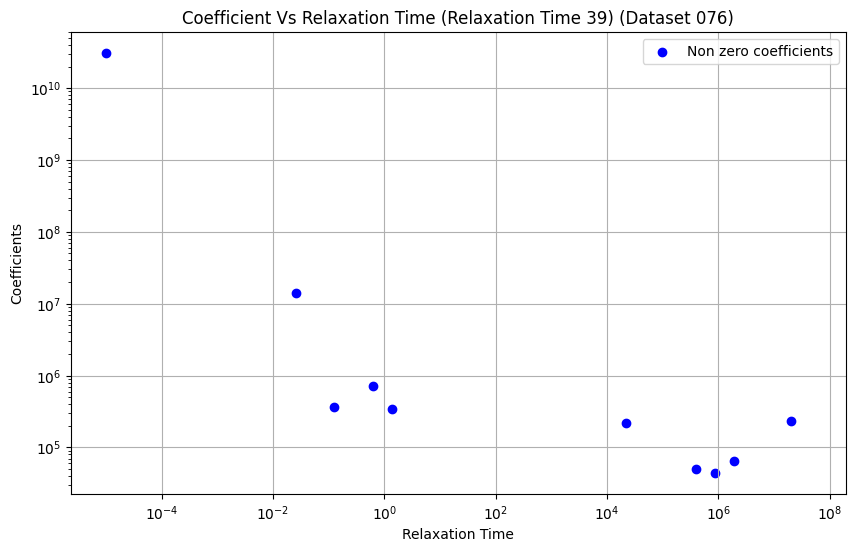

In [171]:
# Plot the original data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(t1, coef1, label='Non zero coefficients', color='blue')
plt.xlabel('Relaxation Time')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.yscale('log')
plt.title('Coefficient Vs Relaxation Time (Relaxation Time '+str(number_coefficients)+') (Dataset 076)')    ######### Change Relaxation Time
plt.legend()
plt.grid(True)
plt.savefig('./sample_data/Lasso2_Cof_V_Re_076_for_'+str(number_coefficients)+'.png')            ######### Change Relaxation Time
plt.show()

Calculate storage and loss modulus using the coefficients after Lasso regression and clustering (3rd step)

In [172]:
Gp_CuL=0
Gdp_CuL=0
Gt_CuL=0

for i in range(0,num_clusters):
  Gp_CuL=Gp_CuL+((f_Omega**2)*(t1[i]**2))/(1+(f_Omega**2)*(t1[i]**2))*coef1[i]
  Gdp_CuL=Gdp_CuL+((f_Omega)*(t1[i]))/(1+(f_Omega**2)*(t1[i]**2))*coef1[i]
  Gt_CuL=Gt_CuL+(np.exp(-t0/t1[i]))*coef1[i]


loss1c=np.sqrt((1/200)*(np.sum((f_Gp-Gp_CuL)**2)))
loss2c=np.sqrt((1/200)*(np.sum((f_Gdp-Gdp_CuL)**2)))
Total_lossc=loss1c+loss2c
print(Total_lossc)

4287578.471893646


Check the efficiency of Lasso regression techniques (3rd step) in Storage modulus

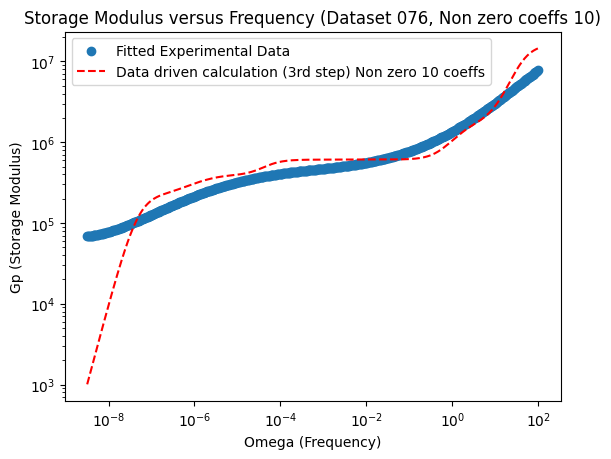

In [173]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gp_CuL, linestyle='--', color='red', label='Data driven calculation (3rd step) Non zero '+str(non_zero_co2)+' coeffs')
plt.title('Storage Modulus versus Frequency (Dataset 076, Non zero coeffs '+str(non_zero_co2)+')')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Check the efficiency of Lasso regression techniques (3rd step) in Loss modulus

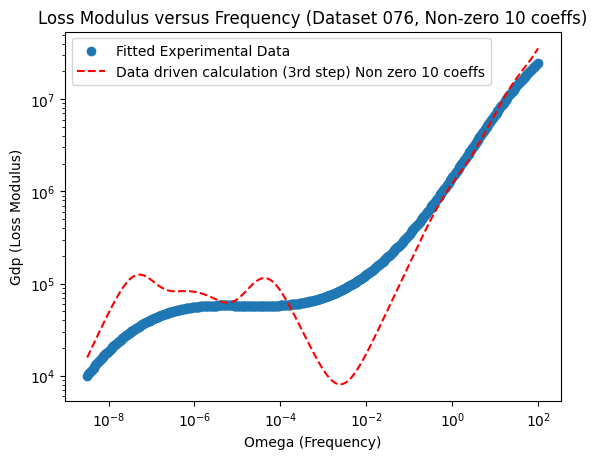

In [174]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_CuL, linestyle='--', color='red', label='Data driven calculation (3rd step) Non zero '+str(non_zero_co2)+' coeffs')
plt.title('Loss Modulus versus Frequency (Dataset 076, Non-zero '+str(non_zero_co2)+' coeffs)')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Gp_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison of Convensional and data-driven technique after 3rd step in term of storage modulus

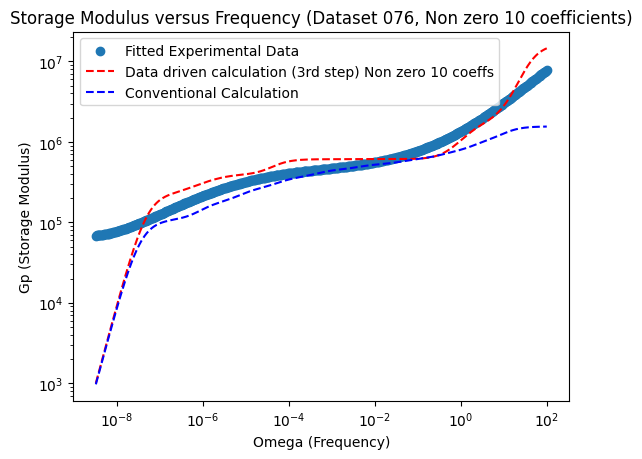

In [175]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gp_CuL, linestyle='--', color='red', label='Data driven calculation (3rd step) Non zero '+str(non_zero_co2)+' coeffs')
plt.plot(f_Omega, Gp_A, linestyle='--', color='blue', label='Conventional Calculation')
plt.title('Storage Modulus versus Frequency (Dataset 076, Non zero '+str(non_zero_co2)+' coefficients)')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Clus_Gp_A_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison of Convensional and data-driven technique after 3rd step in term of loss modulus

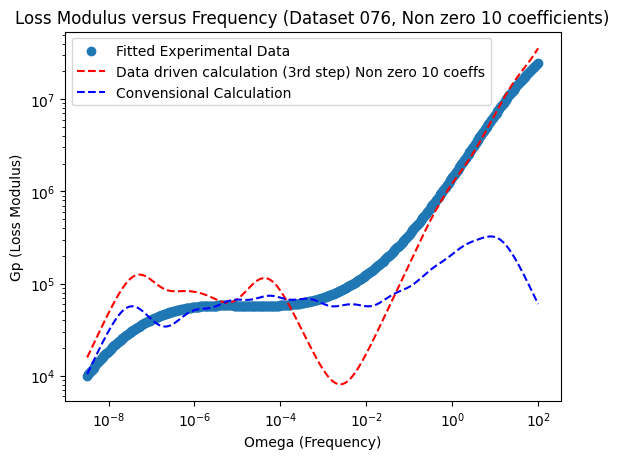

In [176]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_CuL, linestyle='--', color='red', label='Data driven calculation (3rd step) Non zero '+str(non_zero_co2)+' coeffs')
plt.plot(f_Omega, Gdp_A, linestyle='--', color='blue', label='Convensional Calculation')
plt.title('Loss Modulus versus Frequency (Dataset 076, Non zero '+str(non_zero_co2)+' coefficients)')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Loss Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Clus_Gdp_A_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison of convensional and various data-driven techniques in terms of Storage modulus

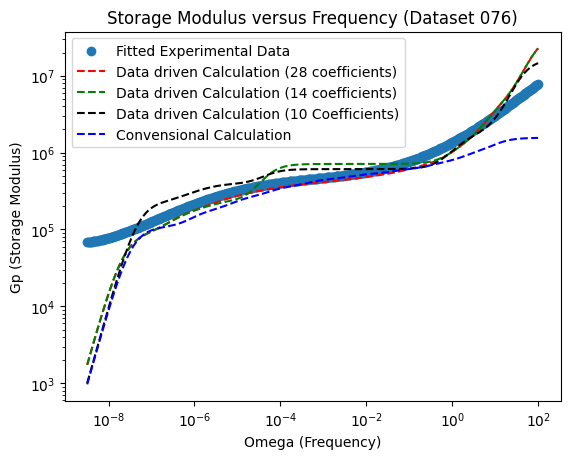

In [177]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gp_C, linestyle='--', color='red', label='Data driven Calculation ('+str(non_zero_co)+' coefficients)')
plt.plot(f_Omega, Gp_Cu, linestyle='--', color='green', label='Data driven Calculation ('+str(num_clusters)+' coefficients)')
plt.plot(f_Omega, Gp_CuL, linestyle='--', color='black', label='Data driven Calculation ('+str(non_zero_co2)+' Coefficients)')
plt.plot(f_Omega, Gp_A, linestyle='--', color='blue', label='Convensional Calculation')
plt.title('Storage Modulus versus Frequency (Dataset 076)')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gp (Storage Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Clus_Gp_ALL_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison of convensional and various data-driven techniques in terms of Loss modulus

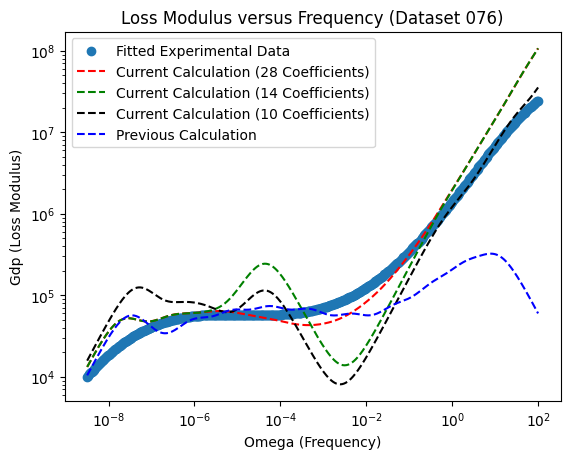

In [178]:
# Plot actual vs predicted values       #######################
plt.scatter(f_Omega, f_Gdp, label='Fitted Experimental Data')
plt.plot(f_Omega, Gdp_C, linestyle='--', color='red', label='Current Calculation ('+str(non_zero_co)+' Coefficients)')
plt.plot(f_Omega, Gdp_Cu, linestyle='--', color='green', label='Current Calculation ('+str(num_clusters)+' Coefficients)')
plt.plot(f_Omega, Gdp_CuL, linestyle='--', color='black', label='Current Calculation ('+str(non_zero_co2)+' Coefficients)')
plt.plot(f_Omega, Gdp_A, linestyle='--', color='blue', label='Previous Calculation')
plt.title('Loss Modulus versus Frequency (Dataset 076)')   #### Chnage relaxation Time
plt.xlabel('Omega (Frequency)')
plt.ylabel('Gdp (Loss Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Clus_Gdp_ALL_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()

Comparison of convensional and various data-driven techniques in terms of Shear modulus

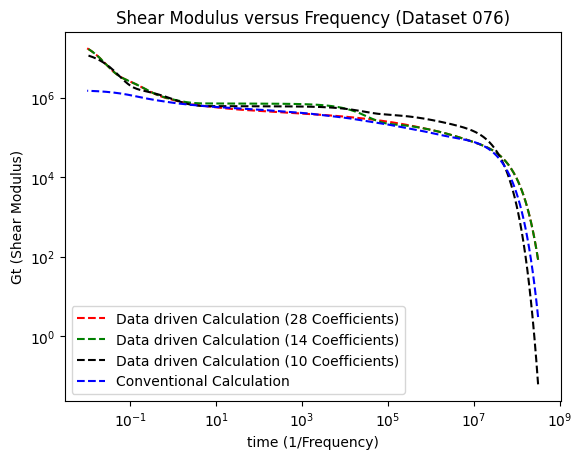

In [179]:
# Plot actual vs predicted values       #######################
plt.plot(t0, Gt_C, linestyle='--', color='red', label='Data driven Calculation ('+str(non_zero_co)+' Coefficients)')
plt.plot(t0, Gt_Cu, linestyle='--', color='green', label='Data driven Calculation ('+str(num_clusters)+' Coefficients)')
plt.plot(t0, Gt_CuL, linestyle='--', color='black', label='Data driven Calculation ('+str(non_zero_co2)+' Coefficients)')
plt.plot(t0, Gt_A, linestyle='--', color='blue', label='Conventional Calculation')
plt.title('Shear Modulus versus Frequency (Dataset 076)')   #### Chnage relaxation Time
plt.xlabel('time (1/Frequency)')
plt.ylabel('Gt (Shear Modulus)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./sample_data/Lasso2_Clus_Gdp_ALL_log02_for_'+str(number_coefficients)+'.png')       #### Chnage Relaxation Time
plt.show()